In [1]:
import pandas as pd
import numpy as np

In [3]:
# load training set structures
train = pd.read_csv('train.csv.gz')

In [4]:
# load dataframe containing atomic sites from structure files 
sites = pd.read_csv('sites_from_cifs.csv').drop_duplicates(
    subset=['id', 'site_index'])  
sites = sites[sites.id.isin(train.id)]

sites.head()

,site_index,site_type,sortedformula,numsites,id
0,0,Hf,Hf1 N1,2,icsd_183420
1,1,N,Hf1 N1,2,icsd_183420
2,0,Hf,Hf1 N1,2,icsd_183419
3,1,N,Hf1 N1,2,icsd_183419
4,0,Hf,Hf6 N8,14,icsd_097997


In [5]:
# repeat each site 256 times (each site has 256 embeddings)
site_indices = np.concatenate([np.arange(256) for _ in train.id])
crystals = np.concatenate([np.array([id_] * 256) for id_ in train.id])

index_df = pd.DataFrame(crystals, columns=['id'])
index_df['site_index'] = site_indices

In [6]:
# remove any duplicates
duplicates = index_df.duplicated()
index_no_duplicates = index_df[~duplicates]

In [7]:
# load numpy array containing Tensorflow extracted 256-dimensional embeddings
embed = np.load('embed_unfolded.npy')
embed = embed.reshape((-1, 256))
embed_no_duplicates = embed[~duplicates]

In [8]:
embed_df = pd.DataFrame(embed_no_duplicates)
embed_df['id'] = index_no_duplicates['id'].values
embed_df['site_index'] = index_no_duplicates['site_index'].values

In [9]:
embed_df.shape

(6061824, 258)

In [10]:
embed_df_reindex = embed_df.set_index(['id', 'site_index'])

In [11]:
embed_df_reindex.head()

0         1         2         3         4    \
id          site_index                                                     
icsd_183420 0           0.074581  0.012751 -0.491594 -0.584572  0.010943   
            1           0.052675  0.258520 -0.314539 -0.612382 -0.134685   
            2           0.143111  0.132185 -0.165213 -0.358658  0.009667   
            3           0.143111  0.132185 -0.165213 -0.358658  0.009667   
            4           0.143111  0.132185 -0.165213 -0.358658  0.009667   

                             5         6         7         8         9    ...  \
id          site_index                                                    ...   
icsd_183420 0           0.497070  0.710478  0.242098  0.036993  0.877057  ...   
            1           0.333779  0.830218  0.325393 -0.269803  0.557882  ...   
            2           0.102937  0.244786  0.137625 -0.116469  0.146291  ...   
            3           0.102937  0.244786  0.137625 -0.116469  0.146291  ...   
            4           0.102937  0.244786  0.137625 -0.116469  0.146291  ...   

                             246       247       248       249       250  \
id          site_index                                                     
icsd_183420 0           0.395979  0.641993  0.116030 -0.592747 -0.087281   
            1           0.228676  0.345401  0.033590 -0.340817  0.056079   
            2           0.237528  0.111172 -0.024468 -0.161278  0.088160   
            3           0.237528  0.111172 -0.024468 -0.161278  0.088160   
            4           0.237528  0.111172 -0.024468 -0.161278  0.088160   

                             251       252       253       254       255  
id          site_index                                                    
icsd_183420 0           0.765156  0.842806 -0.176150 -0.787999  0.459984  
            1           0.742982  0.704648 -0.124404 -0.741073  0.530541  
            2           0.324993  0.198570 -0.060744 -0.344714  0.253779  
            3           0.324993  0.198570 -0.060744 -0.344714  0.253779  
            4           0.324993  0.198570 -0.060744 -0.344714  0.253779  

[5 rows x 256 columns]

In [12]:
site_embeddings = embed_df_reindex.reindex(sites[['id', 'site_index']])

In [13]:
site_embeddings.shape

(408571, 256)

In [14]:
sites.shape

(408571, 5)

In [15]:
site_embeddings.columns = site_embeddings.columns.astype(str)

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

In [19]:
embeddings = site_embeddings.reset_index(drop=True)

In [22]:
train = pd.read_csv('train.csv.gz')
sites = pd.read_csv('sites_from_cifs.csv').drop_duplicates(
    subset=['id', 'site_index'])
sites = sites[sites.id.isin(train.id)]

sites = sites.reset_index(drop=True)

sites.head()

,site_index,site_type,sortedformula,numsites,id
0,0,Hf,Hf1 N1,2,icsd_183420
1,1,N,Hf1 N1,2,icsd_183420
2,0,Hf,Hf1 N1,2,icsd_183419
3,1,N,Hf1 N1,2,icsd_183419
4,0,Hf,Hf6 N8,14,icsd_097997


In [23]:
embeddings.shape

(408571, 256)

In [24]:
sites.shape

(408571, 5)

In [25]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [26]:
# perform PCA followed by tsne on 'Ba' site embeddings
pca_xform = PCA(n_components=10, whiten=False).fit_transform(embeddings[sites.site_type == 'Ba'])

tsne = TSNE(n_components=2, init='pca',
            random_state=0, verbose=10)

Y = tsne.fit_transform(pca_xform)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6553 samples in 0.007s...
[t-SNE] Computed neighbors for 6553 samples in 0.303s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6553
[t-SNE] Computed conditional probabilities for sample 2000 / 6553
[t-SNE] Computed conditional probabilities for sample 3000 / 6553
[t-SNE] Computed conditional probabilities for sample 4000 / 6553
[t-SNE] Computed conditional probabilities for sample 5000 / 6553
[t-SNE] Computed conditional probabilities for sample 6000 / 6553
[t-SNE] Computed conditional probabilities for sample 6553 / 6553
[t-SNE] Mean sigma: 0.069896
[t-SNE] Computed conditional probabilities in 0.574s
[t-SNE] Iteration 50: error = 71.3896027, gradient norm = 0.0068959 (50 iterations in 0.735s)
[t-SNE] Iteration 100: error = 68.1519547, gradient norm = 0.0043007 (50 iterations in 0.524s)
[t-SNE] Iteration 150: error = 66.6865845, gradient norm = 0.0030056 (50 iterations in 0.519s)
[t-SNE] Iteration 200: error = 

In [27]:
Y.shape

(6553, 2)

In [28]:
# path to current directory containing "*_only.csv" files (atomic sites by site class: chalcogens, halogens, tetrels, pnitogens)
ba_path = os.getcwd()

dfs = []
for file in os.listdir(ba_path):
    if file.endswith('only.csv'):
        dfs += [pd.read_csv(os.path.join(ba_path, file))]

In [29]:
site_types = pd.concat(dfs)[['site_index', 'id', 'site_type', 'site_nrg']]

In [30]:
ba_sites = sites[sites.site_type == 'Ba']
ba_sites = ba_sites.merge(site_types.rename(columns={'site_type': 'class'}),
                          on=['site_index', 'id'], how='left')

In [31]:
ba_sites['tsne_x'] = Y[:, 0]
ba_sites['tsne_y'] = Y[:, 1]

Text(0.5, 1.0, 'Ba sites T-SNE')

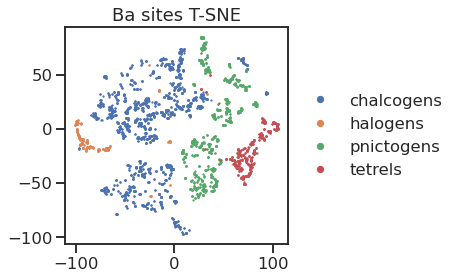

In [32]:
# plot tsne x and y components
fig = plt.figure(figsize=(4,4))
for class_, df in ba_sites.groupby('class'):
    plt.plot(df.tsne_x, df.tsne_y, '.', ms=2.5, label=class_)

plt.legend(loc='center left', bbox_to_anchor=(1, .5), markerscale=5)
plt.title('Ba sites T-SNE')

Text(0.5, 1.0, 'Ba sites T-SNE')

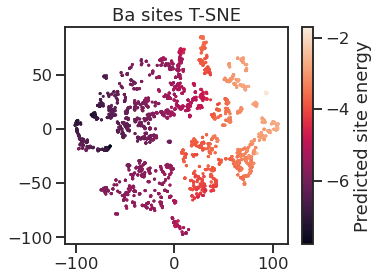

In [33]:
fig = plt.figure(figsize=(5,4))

plt.scatter(ba_sites.tsne_x, ba_sites.tsne_y, c=ba_sites.site_nrg, s=2.5)
cbar = plt.colorbar()
cbar.set_label('Predicted site energy')

#plt.legend(loc='center left', bbox_to_anchor=(1, .5), markerscale=5)
plt.title('Ba sites T-SNE')